In [1]:
import pymysql
from time import sleep
from selenium import webdriver as wd
from selenium.webdriver.common.by import By
import pandas as pd
import random

### DB 연결함수 형성 + 테스트용 DB와 테이블 생성
class Connection:
    def __init__(self) :
        self.host = 'localhost'
        self.port = 3306
        self.database = 'test'
        self.username = 'root'
        self.password = '1111'

    def con(self):
        try :
            conn = pymysql.connect(host=self.host, user=self.username, 
                                   passwd=self.password, db=self.database, port=self.port,
                                   use_unicode=True, charset='utf8mb4')
            return conn
        except Exception as e :
            print(e)
            return False

        
## CREATE DATABASE test default charset=utf8
## 데이터베이스 만든 상태에서 시작할 것
db = Connection()
conn = db.con()
cursor = conn.cursor()

if conn != False :
    print(conn)
    print('connected!')

cursor.execute("Use test;")
sql1 = """CREATE TABLE IF NOT EXISTS `T_OKKY_BOARD`(
`ID` INT(11) UNSIGNED NOT NULL AUTO_INCREMENT, 
`TITLE` VARCHAR(100) NOT NULL, 
`CRE_DATE` DATETIME NULL, 
PRIMARY KEY (`ID`), 
FULLTEXT INDEX `FT_OKKY_TITLE` (`TITLE`)  WITH PARSER `ngram`
)"""
print(sql1)
cursor.execute(sql1)
conn.commit()


options = wd.ChromeOptions()
options.add_argument("no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36")
driver = wd.Chrome(executable_path=r'C:\Program Files (x86)\Google\Temp\chromedriver.exe', options = options)

    
offset =10
for idx in range(offset+1) :        
    url = f'https://okky.kr/articles/questions?offset={idx*24}&max=24&sort=id&order=desc'
    driver.get(url)
    rand_value = random.uniform(2,4)
    sleep(rand_value)

    li_list = driver.find_elements(by=By.CSS_SELECTOR, value='#list-article > div.panel > ul.list-group > li')
    for li in li_list :
        title = li.find_element_by_css_selector('h5 > a')
        date = li.find_element_by_css_selector('.timeago')
        title_text = title.text.replace("\\", "W")
        title_text = title.text.replace("'", "\\")
#         print(title.text)

        date_text = date.text
        sql3 = f"""INSERT INTO T_OKKY_BOARD(TITLE, CRE_DATE) VALUES("{title_text}", "{date_text}");"""
        cursor.execute(sql3)
        conn.commit()

connected!
CREATE TABLE IF NOT EXISTS `T_OKKY_BOARD`(
`ID` INT(11) UNSIGNED NOT NULL AUTO_INCREMENT, 
`TITLE` VARCHAR(100) NOT NULL, 
`CRE_DATE` DATETIME NULL, 
PRIMARY KEY (`ID`), 
FULLTEXT INDEX `FT_OKKY_TITLE` (`TITLE`)  WITH PARSER `ngram`
)


C:\Users\LG\AppData\Local\Temp\ipykernel_9208\2313883732.py:55: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = wd.Chrome(executable_path=r'C:\Program Files (x86)\Google\Temp\chromedriver.exe', options = options)
C:\Users\LG\AppData\Local\Temp\ipykernel_9208\2313883732.py:67: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  title = li.find_element_by_css_selector('h5 > a')
C:\Users\LG\AppData\Local\Temp\ipykernel_9208\2313883732.py:68: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  date = li.find_element_by_css_selector('.timeago')


기업 보안..? 쉴드..? 도와주세요 선배님들..!
맥북에어 m1 파이썬 오류 있어요 ㅠㅠ
자바 int + string
좌우정렬이 되지 않습니다
ajax를 활용한 댓글 수정 중 에러가 안나옵니다.
aws ec2 spring 배포 질문입니다
aws ec2 spring 배포 질문입니다
제발 도와주세요 ㅠ
mybatis의 sql문 객체에 세션값 넣는 중인데 안되는 부분이 있어서 질문해요!!!
로컬에서는 열리는 페이지가 배포하고 운영으로 보면 안열립니다...
Spring JPA null 분기처리
(Database 질문) 인덱스 스캔과 풀 테이블 스캔에 대한 질문입니다!
자바스크립트 오류..한글분리현상
이렇게 아래에서 올라오는 액션바에 대해 정확한 용어가 있을까요?
인터넷 속도가 안 나옵니다.
CRUD 유효성검사는 어디서, 얼만큼 해야 좋은걸까요?
github 원격 레포지토리 질문
VScode 파이썬 독학중인 뉴비입니다.
spring 맵핑이 성공 실패를 반복합니다
vue cannot find module
node.js express mysql 모듈 사용해서 탭 4개 이상 띄웠을 시 요청이 늦게오는 현상
Html에서 웹뷰의 사이즈를 얻는 법이 있을까요.
코딩 뉴비입니다 0x2*8 이 왜 0x10인지 궁금합니다.
python loadLibrary 시 에러 ..
-
CSS a:active 모바일에서 가능하게 하는 방법이 궁금합니다...
DB 쿼리 질문
프론트엔드의 id와 백엔드 데이터베이스의 id
mvvm이 너무 헷갈리는데요....ㅠㅠㅠ
DAO나 VO 없이 mybatis 두개 이상의 패러미터를 넘겨주는 방법이 있을까요?
c언어 질문
nodejs] nodemon 으로 서버시작시 의문점이 있습니다.
6년차 연봉 질문(업계 대비)
자바 한글 관련 질문있습니다.
[gcc] 컴파일 옵션 문의합니다. (Tbss)
c# 요청 데이터 배열과 응답 데이터 배열 비교 후 list 담기
graphQL subscription 질문입니다
Mysql PK 와 UK 를 동일 필드에 같이 거는 이유 (

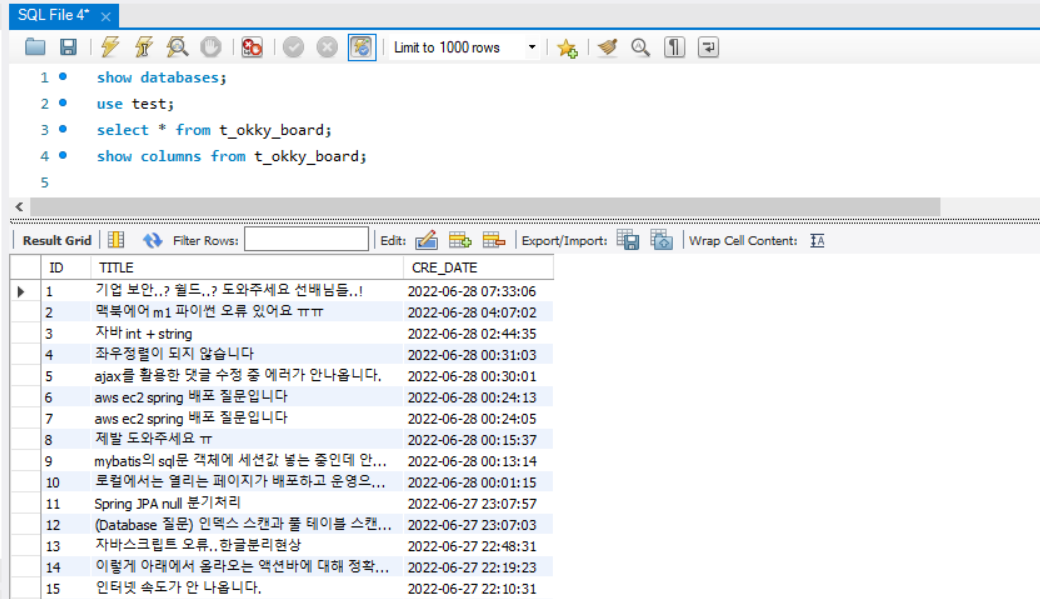

In [3]:
sql4 = """SELECT *  
FROM T_OKKY_BOARD
WHERE TITLE LIKE '%spring%'
ORDER BY cre_date DESC"""

cursor.execute(sql4)
result = cursor.fetchall()
for data in result :
    print(data)

(6, 'aws ec2 spring 배포 질문입니다', datetime.datetime(2022, 6, 28, 0, 24, 13))
(7, 'aws ec2 spring 배포 질문입니다', datetime.datetime(2022, 6, 28, 0, 24, 5))
(11, 'Spring JPA null 분기처리', datetime.datetime(2022, 6, 27, 23, 7, 57))
(19, 'spring 맵핑이 성공 실패를 반복합니다', datetime.datetime(2022, 6, 27, 20, 4, 35))
(41, 'React + Spring Security + JWT + Mybatis 해당 구성으로 회원가입 및 로그인', datetime.datetime(2022, 6, 27, 15, 53, 13))
(73, 'url 를 통한 page 이동 (spring, js)', datetime.datetime(2022, 6, 27, 8, 16, 32))
(90, 'SpringbootSecurity oauth2을 사용 중인데, 회원가입 후 로그인하는 기능을 추가하고 싶어요!', datetime.datetime(2022, 6, 26, 17, 59, 18))
(105, 'springMVC 와 oracle cloud db 연동을 wallet으로 해보신분있나요?(Universal Connection Pool을 시작할 수 없습니다 에러)', datetime.datetime(2022, 6, 26, 4, 42, 36))
(123, 'Spring webclient를 이용한 API 코드 좀 봐주세요', datetime.datetime(2022, 6, 25, 15, 58, 6))
(124, 'spring 특정 유저 차단 기능을 만드려면 어떻게 해야 하나요?', datetime.datetime(2022, 6, 25, 15, 52, 9))
(200, 'PostgreSQL의 키워드를 Spring JPA - negative query에 :parameter로 받을 수 있을까요?', d